In [1]:
# Purpose: Import necessary libraries for data manipulation, machine learning, and visualization.
# pandas: For data manipulation and analysis.
# StandardScaler: For feature scaling.
# train_test_split: For splitting the dataset into training and testing sets.
# SVC: Support Vector Classifier for building the model.
# accuracy_score, precision_score, etc.: For evaluating the model's performance.
# matplotlib and seaborn: For data visualization.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('DDOS.csv')

In [3]:
# Purpose:
# Strip any leading or trailing whitespace from the column names.
# Remove any rows that contain missing values to ensure a clean dataset.

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Handle missing values
data = data.dropna()

In [4]:
# Purpose: Separate the dataset into features (independent variables) and the target variable (dependent variable).
# features: All columns except the 'Label'.
# target: The 'Label' column which contains the output classes.
# The target element in the dataset is the "Label" column. This column classifies each
# network flow as either "BENIGN" or some other label representing a type of attack.
# The "Label" is typically the feature you want to predict in classification tasks,such as
# identifying whether a network flow is normal (benign) or part of an attack (e.g., DDoS).

# Select features and target variable
features = data.drop(columns=['Label'])
target = data['Label']

In [5]:
# Replace infinite values with NaN
print("Checking for infinite values...")
print("Any infinite values in features:", (features == float('inf')).any().any())
print("Any negative infinite values in features:", (features == float('-inf')).any().any())

# Replace infinite values with NaN
features.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Check how many rows will be dropped before dropping
initial_shape = features.shape[0]  # Save the initial number of rows

# Identify rows that contain NaN values
rows_with_nan = features[features.isna().any(axis=1)]

# Check for NaN values after replacement
nan_count = features.isna().sum().sum()
if nan_count > 0:
    print(f"Found {nan_count} NaN values in the dataset after replacement.")
else:
    print("No NaN values found in the dataset after replacement.")

# Drop rows with NaN values
features = features.dropna()

# Calculate the new number of rows
final_shape = features.shape[0]

# Determine which rows were dropped
dropped_rows_count = initial_shape - final_shape
if dropped_rows_count > 0:
    print(f"Dropped {dropped_rows_count} rows due to NaN values.")

    # Print the indices of the dropped rows
    print("Indices of dropped rows:")
    print(rows_with_nan.index.tolist())

    # Print the features that contained NaN values before dropping rows
    nan_feature_indices = rows_with_nan.columns[rows_with_nan.isna().any()].tolist()
    print("Features that contained NaN values before dropping rows:")
    print(nan_feature_indices)
else:
    print("No rows dropped due to NaN values.")

Checking for infinite values...
Any infinite values in features: True
Any negative infinite values in features: False
Found 60 NaN values in the dataset after replacement.
Dropped 30 rows due to NaN values.
Indices of dropped rows:
[65, 1767, 1890, 3375, 8057, 8405, 13313, 13716, 18253, 33330, 55551, 61529, 88091, 130668, 148284, 174379, 174394, 189925, 194128, 200349, 201237, 203979, 204238, 204640, 208999, 213594, 214432, 214453, 215026, 216496]
Features that contained NaN values before dropping rows:
['Flow Bytes/s', 'Flow Packets/s']


In [6]:
# Update the target variable based on the indices of the features
target = target.loc[features.index]

In [7]:
# Standardize the feature set to have a mean of 0 and a standard deviation of 1.
# This is important for algorithms sensitive to the scale of data, such as SVM.
# Display the first few rows of the scaled features to verify the transformation.

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the first few rows of the scaled features
print(features_scaled[:5])

[[ 2.32829593e+00 -5.15259379e-01 -1.86423645e-01 -2.10205842e-01
  -2.85449637e-01 -1.51993785e-01 -2.85699011e-01 -1.33992703e-01
  -3.14601626e-01 -2.69527918e-01 -7.38410143e-01 -3.31628747e-01
  -7.94984591e-01 -7.09851198e-01  2.02221415e-01  5.66813970e+00
  -5.85116227e-01 -5.57405094e-01 -5.05251261e-01 -3.70062639e-02
  -4.87150827e-01 -4.28133035e-01 -4.81692117e-01 -4.72760234e-01
  -5.46430874e-02 -2.98630372e-01 -2.06635731e-01 -2.94102806e-01
  -2.82340966e-01 -5.61789063e-02 -1.85264683e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.90340202e-01 -2.08682790e-01
   5.90947605e+00 -8.25204213e-02 -1.31476961e-01 -8.44569604e-01
  -9.10574965e-01 -8.55203699e-01 -6.77904402e-01 -5.15406990e-02
  -1.85264683e-01 -1.09378383e-02 -7.35759287e-01  9.91217550e-01
  -4.04760063e-01  0.00000000e+00 -1.09378383e-02 -7.03033020e-01
  -9.03444220e-01 -3.14601626e-01 -7.94984591e-01 -1.90340202e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Display the shapes of the splits
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (157997, 78), X_test shape: (67714, 78)
y_train shape: (157997,), y_test shape: (67714,)


Evaluation Metrics:
Accuracy: 0.9991
Precision: 0.9991
Recall: 0.9991
F1 Score: 0.9991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29321
           1       1.00      1.00      1.00     38393

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714



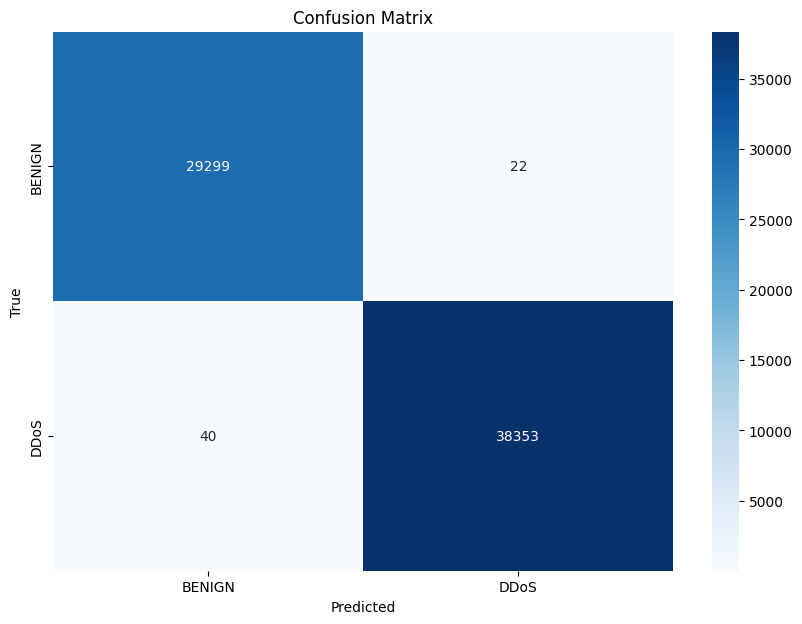

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Display evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Display confusion matrix
confusion_mtx = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
